<a href="https://www.kaggle.com/code/yaaamss03/ml-pipeline?scriptVersionId=241810353" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **1. Fetching the data**

**1.1 Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
import tarfile # Tap Archives - to pack files for multiple distributions
import urllib # for accessing(reading, writing) URLs

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [4]:
def fetching(housing_url = HOUSING_URL,housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok = True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()
fetching()

# **2. Loading the data**

In [5]:
def loading(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# **3. Exploring the data**

In [6]:
housing = loading()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


**3.1 Summary of numerical attributes**

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
housing.shape

(20640, 10)

**The dimensions of the dataset is 20,640 rows and 10 columns**

In [10]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

**3.2 Count of rows for each category**
1. To check how many categories are in this column
2. how many districts are there in each category, we will use value_counts()

In [11]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

**3.4 Checking Nulls and Duplicate values**

In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Note: There is a Null Valued-column **total_bedrooms** and **ocean_proximity** is an object, since we loaded the dataset from csv, it is a text column.

In [13]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

**Total Bedrooms has 207 null values out of 20,640 rows** i.e., around 1% of rows are missing from the dataset. 207 districts are missing this value.

In [14]:
dup = housing[housing.duplicated()]
dup

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


There are **No duplicate rows** in the dataset

**3.5 Visualizing each numerical attribute using Histogram**

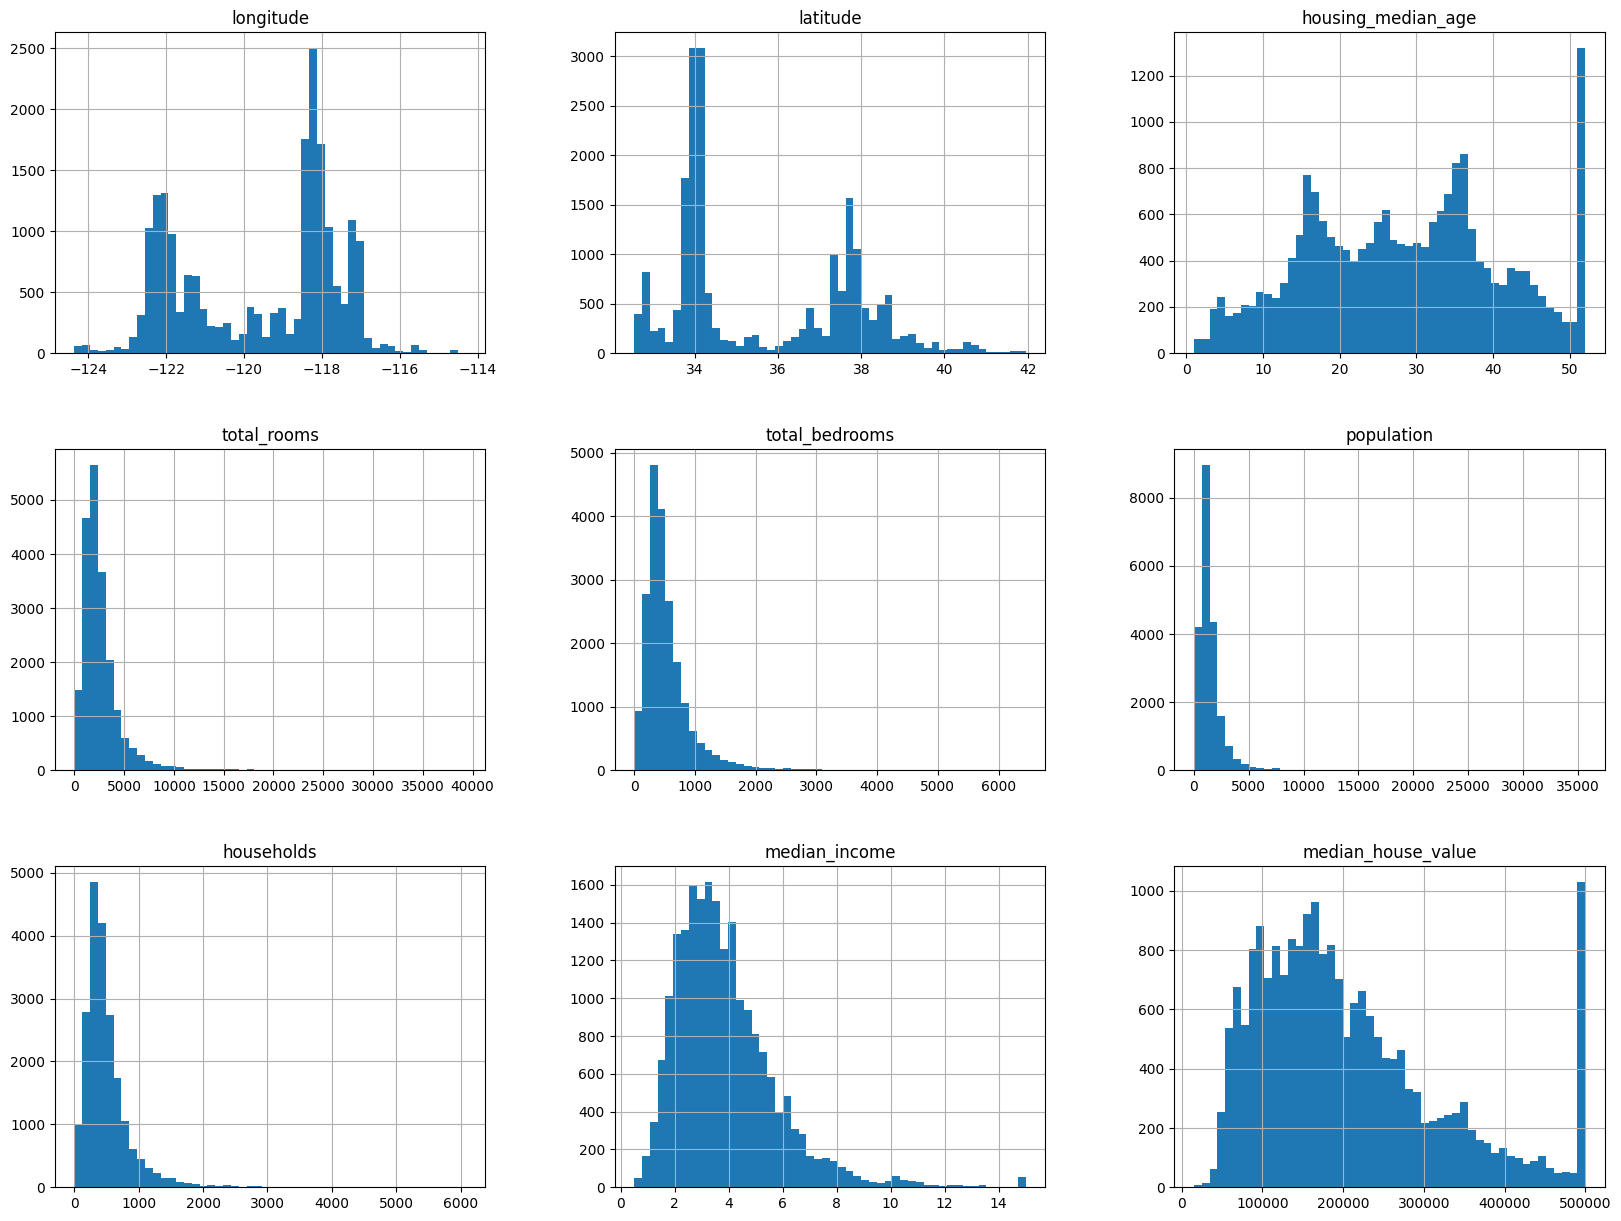

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def histogram(df):
    housing.hist(bins = 50, figsize = (20, 15))
    plt.show()
    
histogram(housing)

**Insights:**
1. **Median Income** column is capped. Eg: 2 means - $20,000
2. **Housing Median Age** and **Median House Value** are also capped. **Median House Value** is the target value (labelled outcome)
3. All the columns are right-tailed with their median on the left, suggesting we have to scale these columns and bring these distributions to a bell-curved in later code blocks.

# **4. Creating Test dataset**

We will create a test dataset before selecting the model, because if you don't do it at this stage, you model will by-heart the patterns in your data and will poorly generalize on unseen data, leading to **overfitting** of the data. 

In [16]:
import numpy as np
import random

def train_test_split(data, ratio):
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = train_test_split(housing, 0.2)

In [17]:
m = len(train_set)
n =len(test_set)

print(f'Size of training set: {m}', '\n'f'Size of test set: {n}')

Size of training set: 16512 
Size of test set: 4128


In [18]:
if m + n == len(housing):
    print(f'True, it is the same')
else:
    print(f'False, it is not the same')

True, it is the same


**Insights:**
1. Training set and Test set have been divided into 2 parts.
2. If we re-run the whole program, these values will change, eventually leading to the ML model looking at the whole dataset. Either we can lock the tests dataset away, or use *random_state = 42* so that it shuffles the same indices instead of going to other indices.

**4.1 Maintaining Consistent test set indices**

1. After re-running it shouldn't interchange indices within the same dataset
2. After fetching updated dataset, it should have stable train/test split

**Solution:** Use dataset's identifier

In [19]:
from zlib import crc32

def test_set_check(identifier, ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < ratio * 2**32

Our **Housing dataset** has no unique identifier, so let's consider **row index as id** as its identifier.

In [20]:
def split_train_test_by_id(data, ratio, id_col):
    ids = data[id_col]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, ratio))
    return data.loc[~in_test_set], data.loc[in_test_set] 
# ~ = not in test_set -> Train set

1. We can use row-index as a unique identifier, but we need to make sure that whenver new data is coming in, it should be appended to the last without deleting any rows. If we cannot guarantee this, use step-2.
2. Since, this dataset doesn't have any identifier, we can use most stable, non-changing features as identifier. Like **latitude and logitude** never change (atleast for a million years)

In [21]:
housing_id = housing.reset_index() # adds an index column
train_set, test_set = split_train_test_by_id(housing_id, 0.2, "index")

In [22]:
housing_id['id'] = housing_id['longitude'] * 1000 + housing_id['latitude']
train_set, test_set = split_train_test_by_id(housing_id, 0.2, 'id')

**4.2 Using scikit learn to split train and test dataset**

In [23]:
from sklearn.model_selection import train_test_split

train_set, test_split = train_test_split(housing, test_size = 0.2, random_state = 42)

**4.3 Sampling bias**

1. **Startified sampling bias:** Dividing data into sub-groups (*stratas*) and taking from those stratas
2. **Sampling Bias:** Randomly choosing from the dataset which in turn leads to biased results since we aren't considering all possible categories.

For **Median Income**, there might be different ranges of people, so it will be useful if we select from all these categories. We need to divide them into categories based on the graph.

<Axes: >

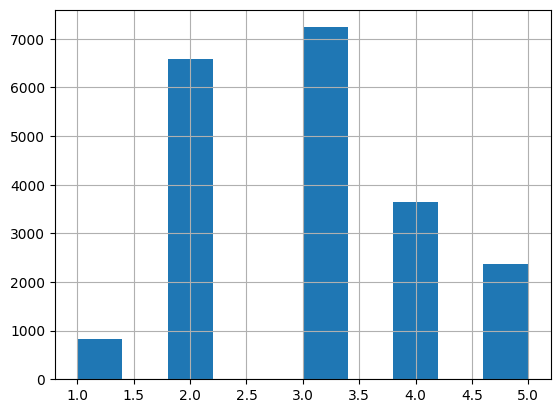

In [24]:
housing['income_cat'] = pd.cut(housing['median_income'],
                              bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels = [1,2,3,4,5])
# cut() function will create new column with labelled categories (1 to 5)
housing['income_cat'].hist()

Now, we can perform **Stratified sampling** from each of these categories to equivalently take from each category

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

strat_test_set['income_cat'].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

Now, we can drop **income_cat** from the dataset.

In [26]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis = 1, inplace = True)

# axis = 1 -> column-level operations
# axis = 0 -> row_level operations

# **5. Visualizing data to gain insights**

**5.1 Create a copy of training set**

We will be using copy of stratified training set to visualize, if our dataset is huge we can take a sample of our dataset for easier visualizations. Since **housing dataset** is small we can go ahead with full training dataset.

In [27]:
housing = strat_train_set.copy()

**5.2 Geographical data - Scatterplot**

<Axes: xlabel='longitude', ylabel='latitude'>

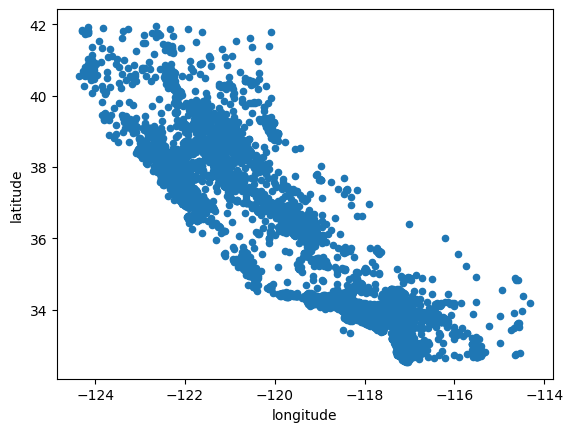

In [28]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude')

**alpha = 0.1** highlights high-density areas where we have denser plots

<Axes: xlabel='longitude', ylabel='latitude'>

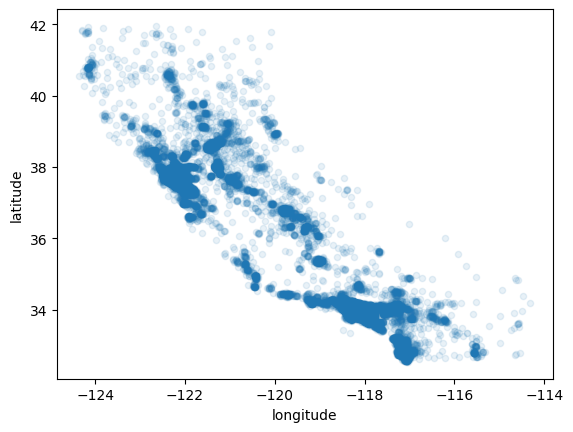

In [29]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)

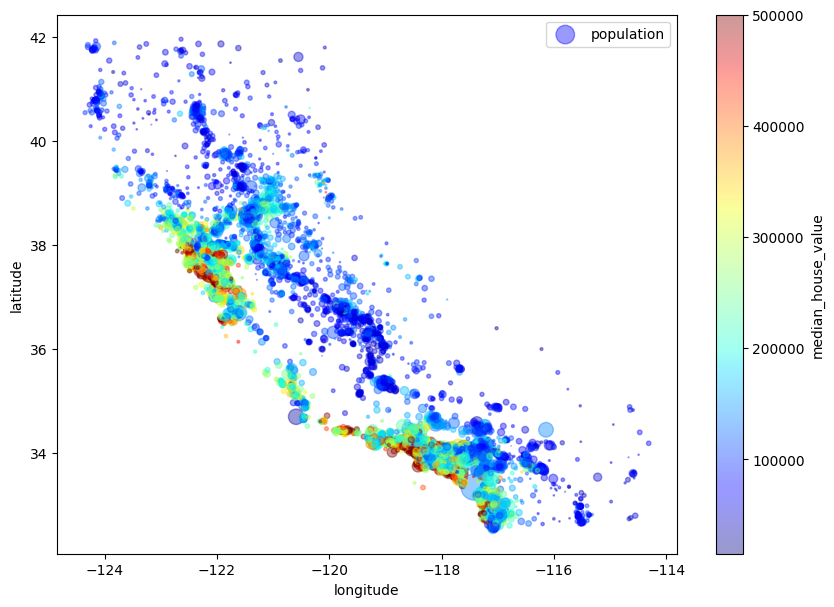

In [30]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4,
            s = housing['population']/100, label = 'population', figsize = (10, 7),
c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True)

plt.legend()

**Insights:** It is evident that ocean view (coastal) is leading to increase in house prices, but this behavior is not present in Northern Coastal regions.

**5.3 Correlations in the dataset**

**Pearson Correlation Coefficient:**
1. Also called **Stadard Correlation Coefficient**
2. Calculates strength and direction of linear relationship between every pair of attributes on a  scatterplot
3. Correlation coefficient range (-1, 1)

In [31]:
def correlation_mat(df, target):
    corr_mat = housing.corr(numeric_only=True) # specify for only numeric columns

    return corr_mat[target].sort_values(ascending = False)

correlation_mat(housing, 'median_house_value')

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

**Insights:**
1. **Median House value** is directly proportional to **Median income**, suggesting that High income people will buy expensive houses
2. **Median House value** is inversely proportional to **Latitude**, suggesting that People at coastal regions will buy expensive houses

**Pearson-correlation function Breakdown:**

In [32]:
import pandas as pd

def classify_target_correlations(df, target_column='median_house_value', threshold=0.1):
    corr_mat = df.corr(numeric_only=True)[target_column].sort_values(ascending=False)
    correlation_data = []

    for col, corr_value in corr_mat.items():
        if col != target_column:
            if corr_value > threshold:
                category = "Positive Correlation"
            elif corr_value < -threshold:
                category = "Negative Correlation"
            else:
                category = "Weak/No Correlation"

            correlation_data.append([col, round(corr_value, 3), category])

    correlation_df = pd.DataFrame(correlation_data, columns=["Column Name", "Correlation Coefficient", "Correlation Category"])
    return correlation_df

correlation_df = classify_target_correlations(housing, threshold=0.1)
correlation_df

,Column Name,Correlation Coefficient,Correlation Category
0,median_income,0.687,Positive Correlation
1,total_rooms,0.135,Positive Correlation
2,housing_median_age,0.114,Positive Correlation
3,households,0.065,Weak/No Correlation
4,total_bedrooms,0.048,Weak/No Correlation
5,population,-0.027,Weak/No Correlation
6,longitude,-0.047,Weak/No Correlation
7,latitude,-0.143,Negative Correlation


**Method 2 To plot Scatter Plot:** Let us plot a scatter matrix, focussing only positively correlated columns

<function scatt_mat at 0x7b33b68593a0>


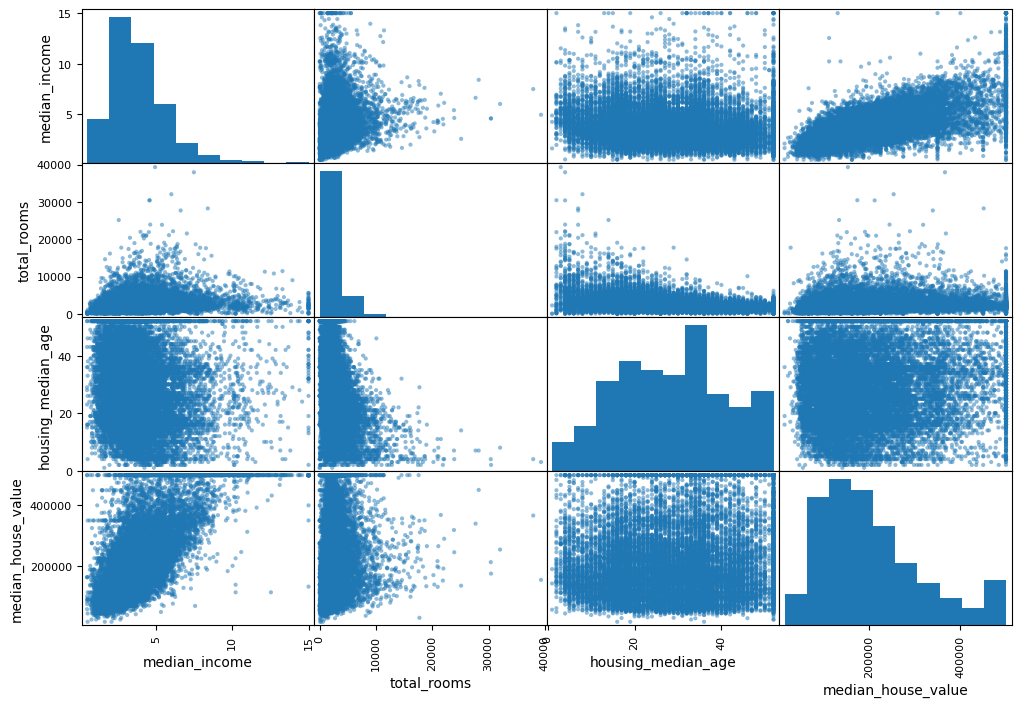

In [33]:
from pandas.plotting import scatter_matrix

def scatt_mat(df, columns):
    return scatter_matrix(df[columns], figsize = (12,8))

scatt_mat(housing, ['median_income', 'total_rooms', 'housing_median_age', 'median_house_value'])
print(scatt_mat)

**Insights:**
1. **Scatterplot:** with every other numerical attribute
2. **Histogram:** with its own attribute
3. **Median Income** and **Median House Value** are displaying a linear trend with each other mostly, than other attributes. Also **Median Income** has the highest correlation coefficient with the target column **Median House Value**

**Scatter plot with most promising Attribute**

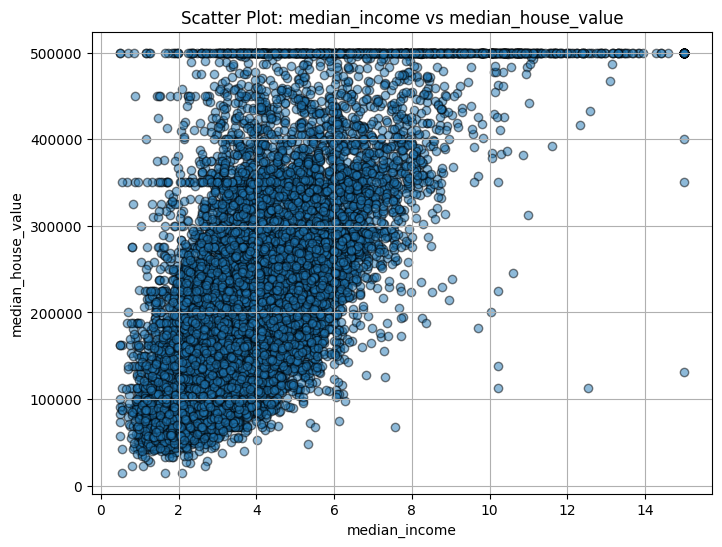

In [34]:
import matplotlib.pyplot as plt

def scatt_plot_with_highly_corr_col(df, columns):
    if len(columns) != 2:
        raise ValueError("Please provide exactly two column names for scatter plot.")

    plt.figure(figsize=(8, 6))
    plt.scatter(df[columns[0]], df[columns[1]], alpha=0.5, edgecolors='k')
    plt.xlabel(columns[0])
    plt.ylabel(columns[1])
    plt.title(f"Scatter Plot: {columns[0]} vs {columns[1]}")
    plt.grid(True)
    
    plt.show()

scatt_plot_with_highly_corr_col(housing, ['median_income', 'median_house_value'])

**Insights:**
1. There is **strong linear trend** between these 2 attributes
2. There is a horizontal line at **500,000**, which is important one and **480,000**, **350,000**, **280,000** showing that these are other less obvious straight lines

**5.4 Feature Creation**

In [35]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [36]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_rooms'] = housing['total_bedrooms'] / housing['total_rooms']
housing['pop_per_household'] = housing['population'] / housing['households']
# housing['bedrooms_per_household'] = housing['total_bedrooms'] / housing['households']

**Re-plot Correlation Values**

In [37]:
correlation_mat(housing, 'median_house_value')

median_house_value     1.000000
median_income          0.687151
rooms_per_household    0.146255
total_rooms            0.135140
housing_median_age     0.114146
households             0.064590
total_bedrooms         0.047781
pop_per_household     -0.021991
population            -0.026882
longitude             -0.047466
latitude              -0.142673
bedrooms_per_rooms    -0.259952
Name: median_house_value, dtype: float64

**Remove Labels from training set**

In [38]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

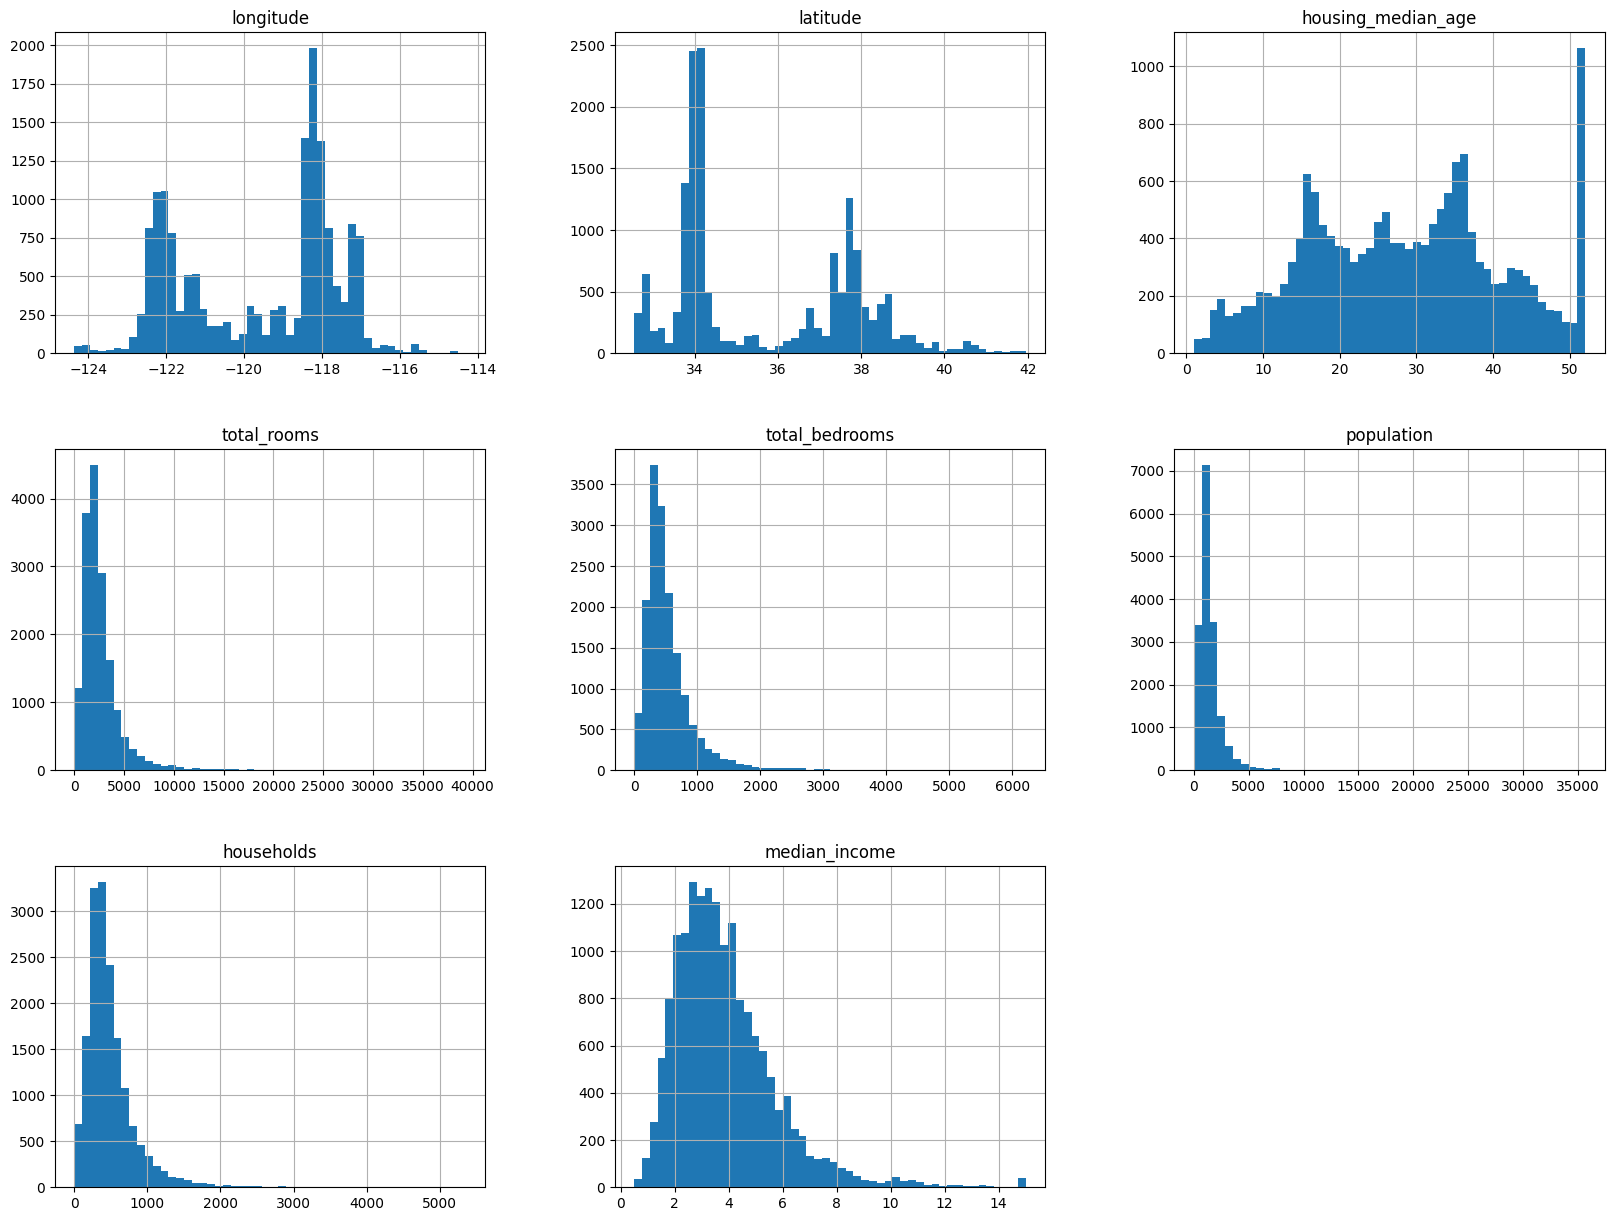

In [39]:
histogram(housing)

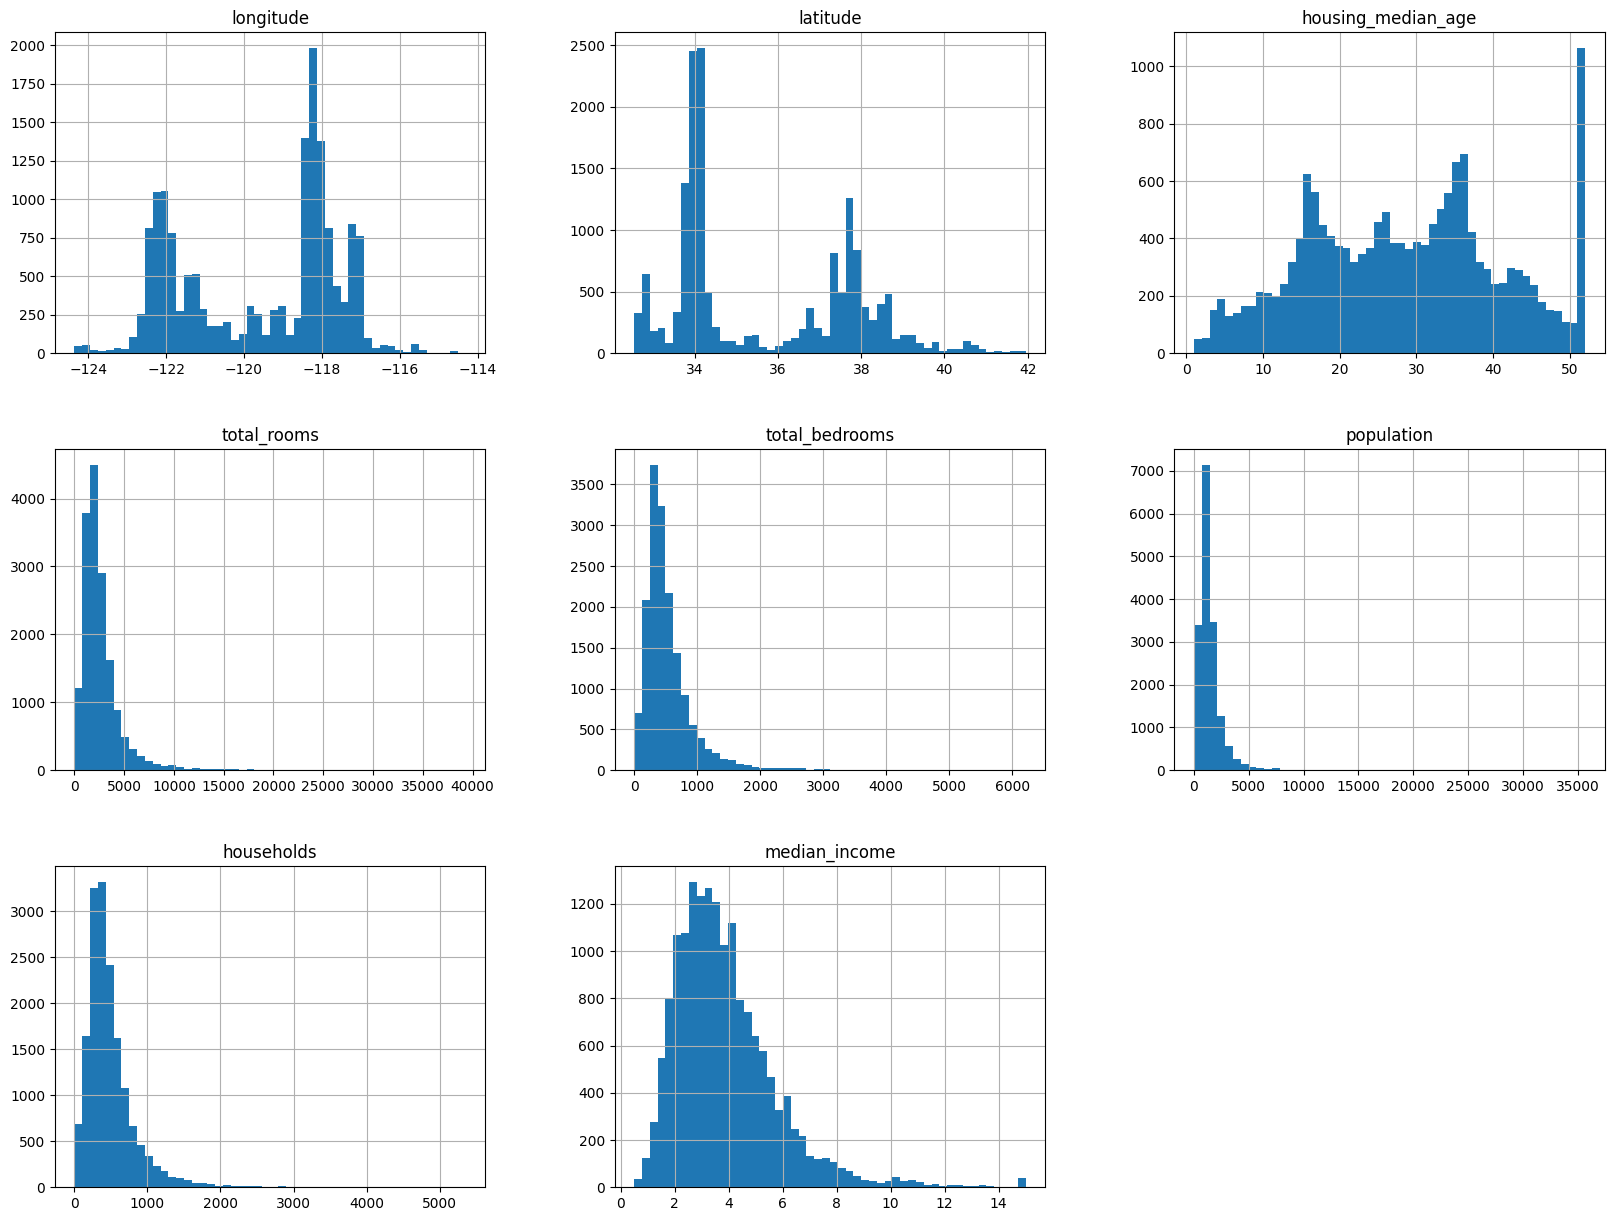

In [40]:
histogram(housing_labels)

# **6. Data Cleaning**

In [41]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

**6.1 Treating NA is Total Bedrooms**

In [42]:
# # option1 Dropping whole column
# housing.drop(subset = ['total_bedrooms'])

# # option2 Dropping NA of Total Bedrooms
# housing.dropna('total_bedrooms', axis = 1)

# # option3 Filling NA with Median Values
# median = housing['total_bedrooms'].median
# housing['total_bedrooms'].fillna(median, inplace = True)

**using Scikit Library**
1. **Median** will work only on numerical attributes
2. Creating a copy without Text Attribute **Ocean Proximity**
   

In [43]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')
housing_num = housing.drop('ocean_proximity', axis = 1)

# fitting imputer instance to training data
imputer.fit(housing_num)

SimpleImputer(strategy='median')

**Insights:**
1. **Imputer** computed mean of all attributes during fitting and stored in the **statistics_** instance.
2. When system goes live, we won't be sure that all attributes are Non-Nulls.
3. So, it is safer to apply Median values to all numerical attributes during this step to avoid any unnecessary Nulls in the dataset.

In [44]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [45]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Using this array, we can futher use our training data to perform transformations, since it computed **Median** for all missing numerical attributes.

In [46]:
X = imputer.transform(housing_num)

**Converting this array -> DataFrame for better readability**

In [47]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [48]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


Thus, we handled all Null Values for all numerical attributes

# **7. Handling Text and Categorical Attributes**

**7.1 Ocean Proximity Column**

In [49]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

# [] -> returns single column as 'Series'
# [[]] -> return subset of columns as 'DataFrame' with all column functionalities, Indexing, and DataFrame Properties

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [50]:
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7277
INLAND             5262
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
Name: count, dtype: int64

In [51]:
housing_cat.dtypes

ocean_proximity    object
dtype: object

**Insights:** This is an **object** datatype. Categories involved are: 
1. <1H OCEAN
2. INLAND
3. NEAR OCEAN
4. NEAR BAY
5. ISLAND

1. **Text Attribute:** Unstructured, Long lines, requires tokenization, NLP, TF-IDF, BERT, Word2Vec
2. **Categorical:** Structured, Short Words, One-hot, ordinal, label Encoding, Clstering and Classification